## Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

## Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

In [4]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df_water = pd.read_csv('water.csv', sep = ',')
df_water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

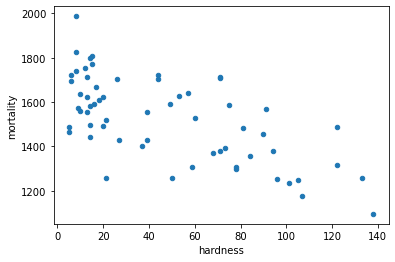

In [7]:
df_water.plot(kind='scatter', x='hardness', y='mortality')

In [15]:
#На графике наблюдается обратно пропорциональная зависимость между жесткостью воды и смертностью.

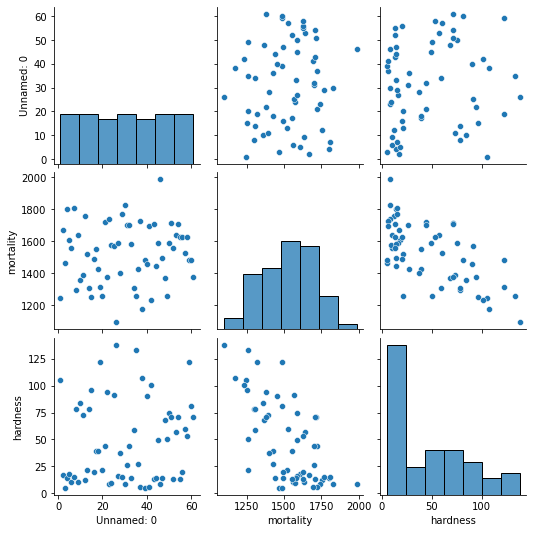

In [8]:
sns.pairplot(df_water)

In [9]:
df_water.corr()

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.077133,0.123075
mortality,0.077133,1.000000,-0.654849
hardness,0.123075,-0.654849,1.000000


<AxesSubplot:>

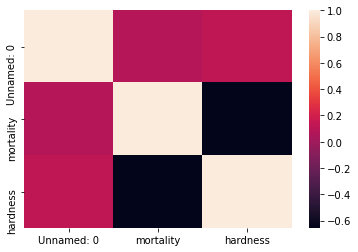

In [10]:
sns.heatmap(df_water.corr())

In [12]:
df_water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [14]:
#Корреляция Пирсона: -0.654849
#Корреляция Спирмена: -0.631665

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
X = df_water[['hardness']]
y = df_water['mortality']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
X_train.shape

(42, 1)

In [21]:
y_train.shape

(42,)

In [32]:
model = LinearRegression()# модель линейной регрессии
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [23]:
model.coef_

array([-3.13167087])

In [24]:
model.intercept_

1668.9722977277095

In [25]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [31]:
model.score(X_test, y_test) # Коэффициент детерминации

0.5046490611017092

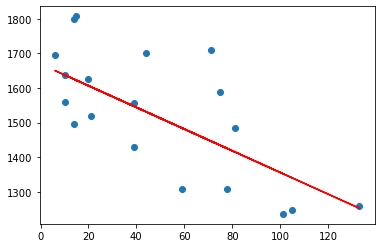

In [30]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [35]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [38]:
X_const.shape

(42, 2)

In [42]:
X[:10]

,hardness
0,105
1,17
2,5
3,14
4,18
5,10
6,15
7,78
8,10
9,84


In [43]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           7.83e-06
Time:                        02:11:50   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [44]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912279


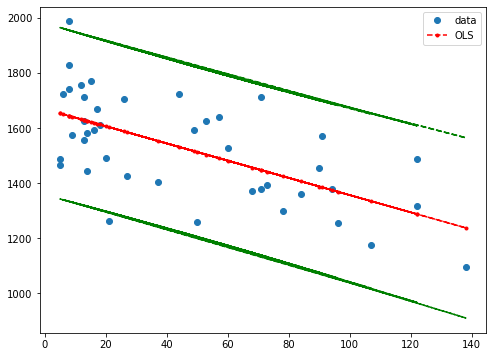

In [45]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

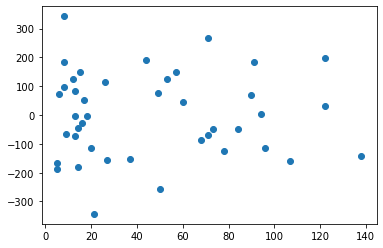

In [54]:
#остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <BarContainer object of 10 artists>)

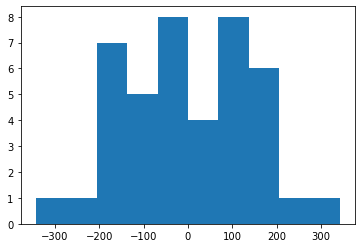

In [52]:
plt.hist(results.resid)

In [53]:
#Наблюдается некоторая асимметрия в распределении остатков, однако ввиду малого числа наблюдений нельзя сделать вывод о ее существенности.

## Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [56]:
df_north = df_water[df_water['location'] == 'North'].copy()
df_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

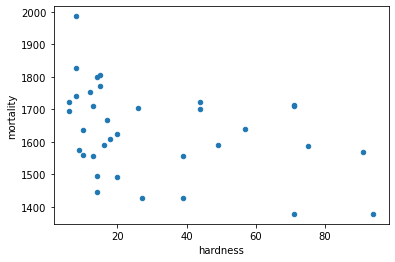

In [61]:
df_north.plot(kind='scatter', x='hardness', y='mortality')# На графике выше зависимость смертности от жесткости воды  менее выражена

In [59]:
df_south = df_water[df_water['location'] == 'South'].copy()
df_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

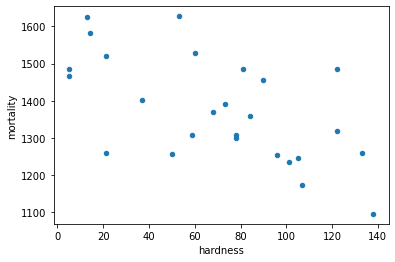

In [62]:
df_south.plot(kind='scatter', x='hardness', y='mortality')# Зависимость смертности от жесткости воды для южных городов является более выраженной

In [65]:
df_north.corr()

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,-0.103548,0.309195
mortality,-0.103548,1.000000,-0.368598
hardness,0.309195,-0.368598,1.000000


In [63]:
df_south.corr()

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.396333,-0.005337
mortality,0.396333,1.000000,-0.602153
hardness,-0.005337,-0.602153,1.000000


In [68]:
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [69]:
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [72]:
# Север Корреляция Пирсона: -0.368598
# Север Корреляция Спирмена: -0.404208

In [ ]:
# Юг Корреляция Пирсона: -0.602153
# Юг Корреляция Спирмена: -0.595723

In [83]:
#Север

In [73]:
X = df_north[['hardness']]
y = df_north['mortality']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [75]:
X_train.shape

(24, 1)

In [76]:
y_train.shape

(24,)

In [77]:
model = LinearRegression()# модель линейной регрессии
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [78]:
model.coef_

array([-1.97686226])

In [79]:
model.intercept_

1688.150229031281

In [80]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [81]:
model.score(X_test, y_test) # Коэффициент детерминации

0.018885304285745863

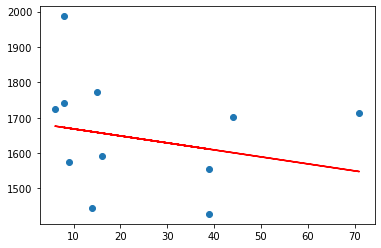

In [82]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [95]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [97]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [98]:
X_const.shape

(18, 2)

In [99]:
X[:10]

,hardness
0,105
2,5
7,78
9,84
10,73
12,21
13,78
14,96
18,122
19,21


In [100]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           7.30e-05
Time:                        02:54:10   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

/Users/wizard/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [101]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1640.220460
hardness      -3.513429
dtype: float64
R2:  0.636380830887719


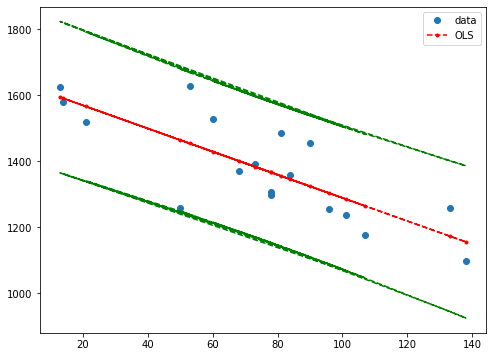

In [102]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

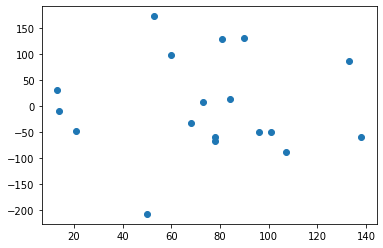

In [103]:
#остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 0., 4., 4., 3., 1., 1., 3., 1.]),
 array([-207.54899972, -169.49497096, -131.4409422 ,  -93.38691343,
         -55.33288467,  -17.2788559 ,   20.77517286,   58.82920162,
          96.88323039,  134.93725915,  172.99128791]),
 <BarContainer object of 10 artists>)

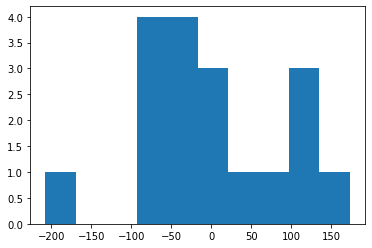

In [104]:
plt.hist(results.resid)

In [106]:
# Юг

In [107]:
X = df_south[['hardness']]
y = df_south['mortality']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [109]:
X_train.shape

(18, 1)

In [110]:
y_train.shape

(18,)

In [111]:
model = LinearRegression()# модель линейной регрессии
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [112]:
model.coef_

array([-3.51342921])

In [113]:
model.intercept_

1640.2204603423374

In [114]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [115]:
model.score(X_test, y_test) # Коэффициент детерминации

-2.551922301235205

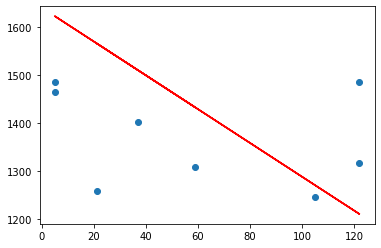

In [116]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [117]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [119]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [120]:
X_const.shape

(18, 2)

In [121]:
X[:10]

,hardness
0,105
2,5
7,78
9,84
10,73
12,21
13,78
14,96
18,122
19,21


In [122]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           7.30e-05
Time:                        02:54:45   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

/Users/wizard/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [123]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1640.220460
hardness      -3.513429
dtype: float64
R2:  0.636380830887719


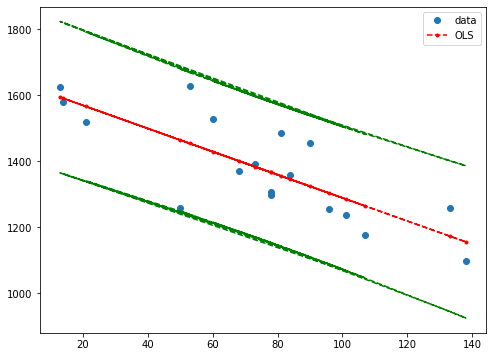

In [124]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

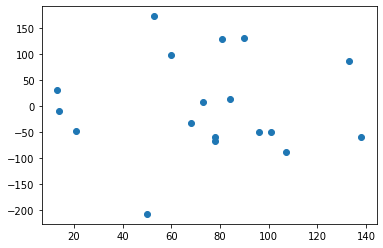

In [125]:
#остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 0., 4., 4., 3., 1., 1., 3., 1.]),
 array([-207.54899972, -169.49497096, -131.4409422 ,  -93.38691343,
         -55.33288467,  -17.2788559 ,   20.77517286,   58.82920162,
          96.88323039,  134.93725915,  172.99128791]),
 <BarContainer object of 10 artists>)

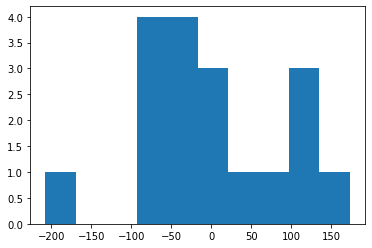

In [126]:
plt.hist(results.resid)